In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Plant usage by Category

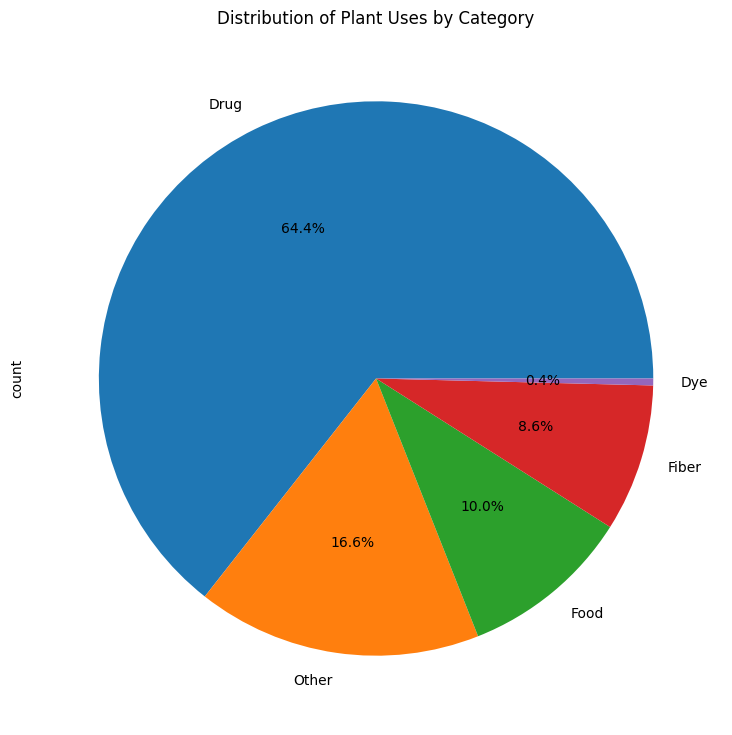

In [10]:
uses =pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\uses.csv')
use_categories = pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\use_categories.csv')

uses = uses.merge(use_categories, left_on= 'use_category', right_on= 'id')
# print(uses)
category_count = uses['name'].value_counts()
plt.figure(figsize = (18,9))
category_count.plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Plant Uses by Category')
plt.show()


## Plant Use by Tribes

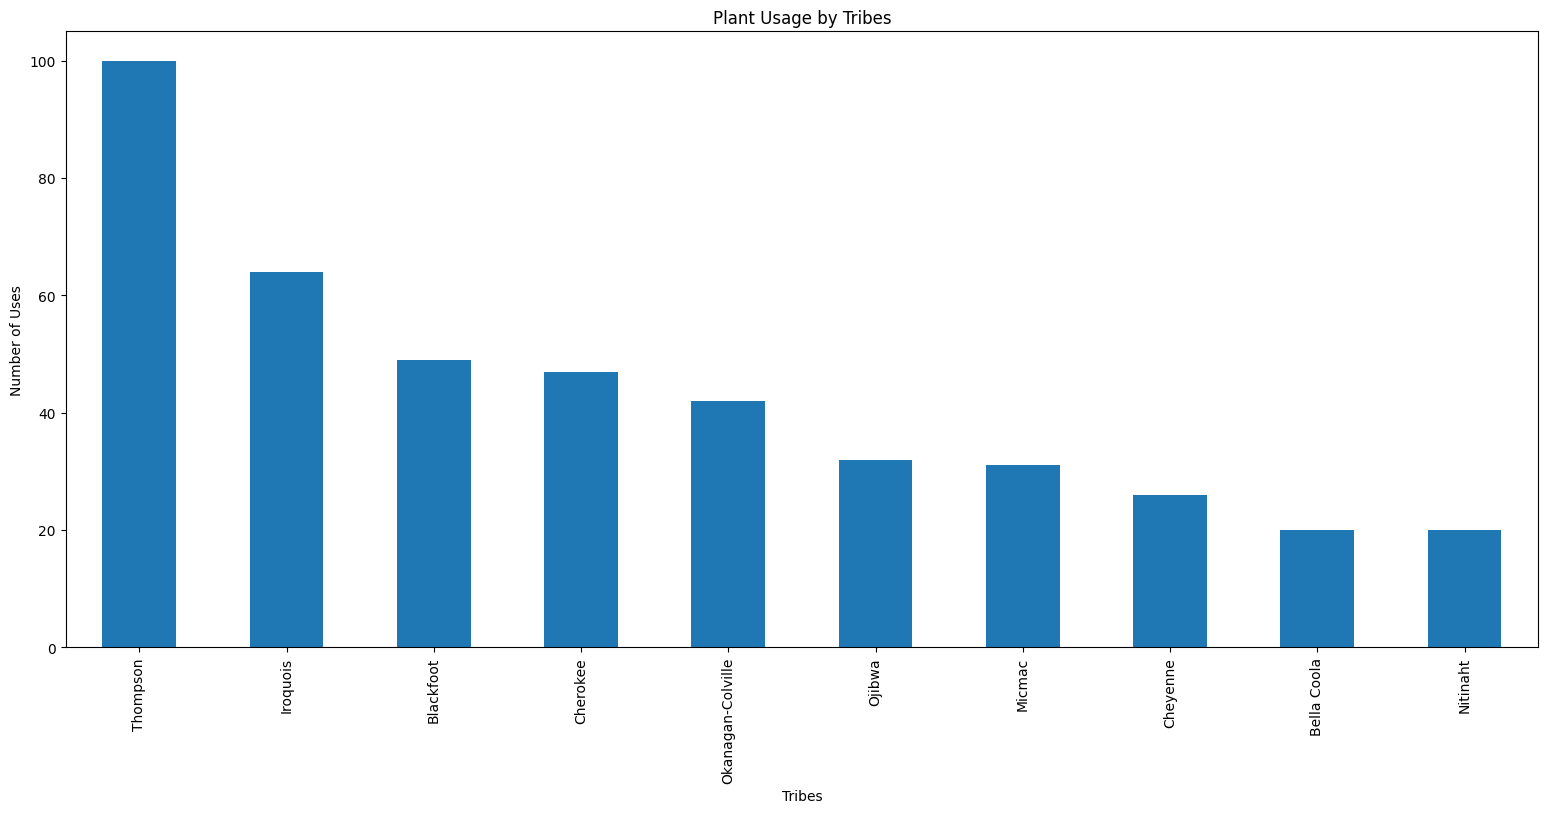

In [20]:
uses = pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\uses.csv')
tribes = pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\tribes.csv')

uses = uses.merge(tribes, left_on = 'tribe', right_on = 'id')
tribe_counts = uses['name'].value_counts().head(10)

plt.figure(figsize =(19,8))
tribe_counts.plot.bar()
plt.title('Plant Usage by Tribes')
plt.ylabel('Number of Uses')
plt.xlabel('Tribes')
plt.show()

## Species Usage

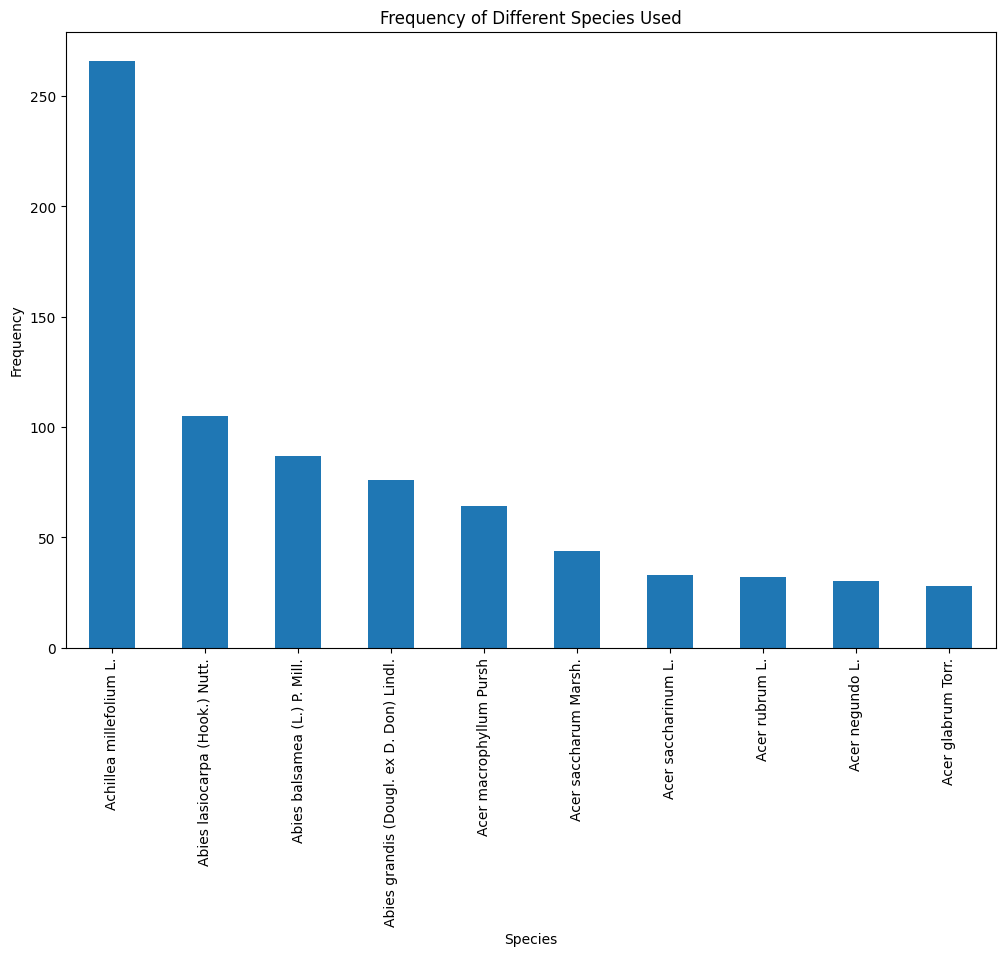

In [21]:
uses = pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\uses.csv')
species = pd.read_csv('C:\\Users\\USER\\Desktop\\training\\Case_Study\\naeb\\data\\naeb_dump\\species.csv')
uses = uses.merge(species, left_on ='species', right_on= 'id')
species_counts = uses['name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
species_counts.plot.bar()
plt.title('Frequency of Different Species Used')
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.show()

### NPASS DATASET

## Activity Records Analysis

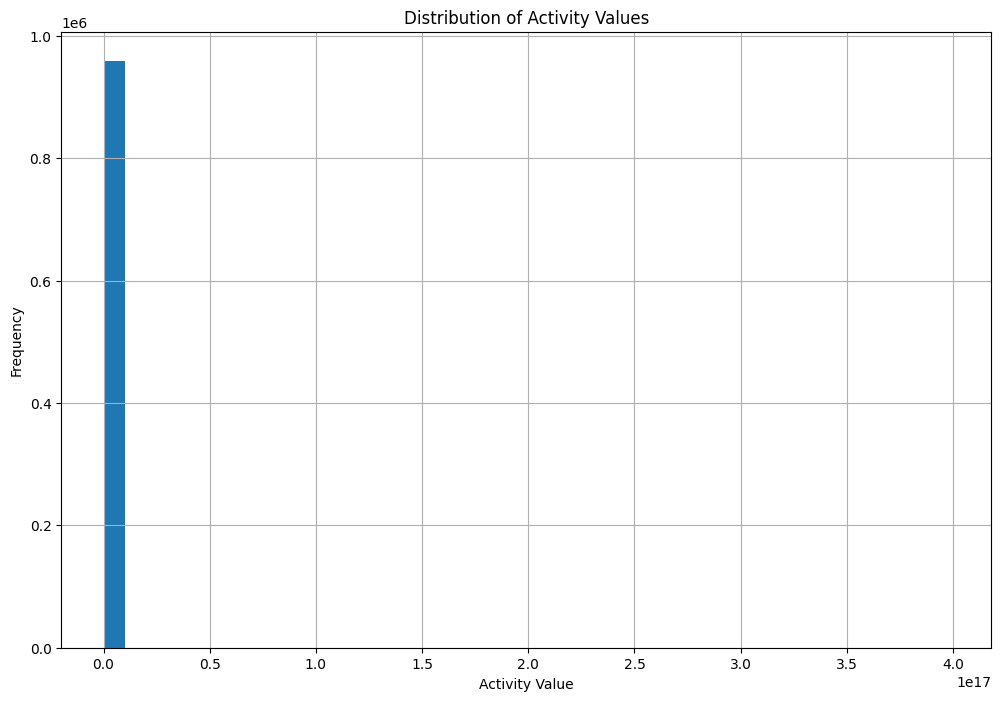

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


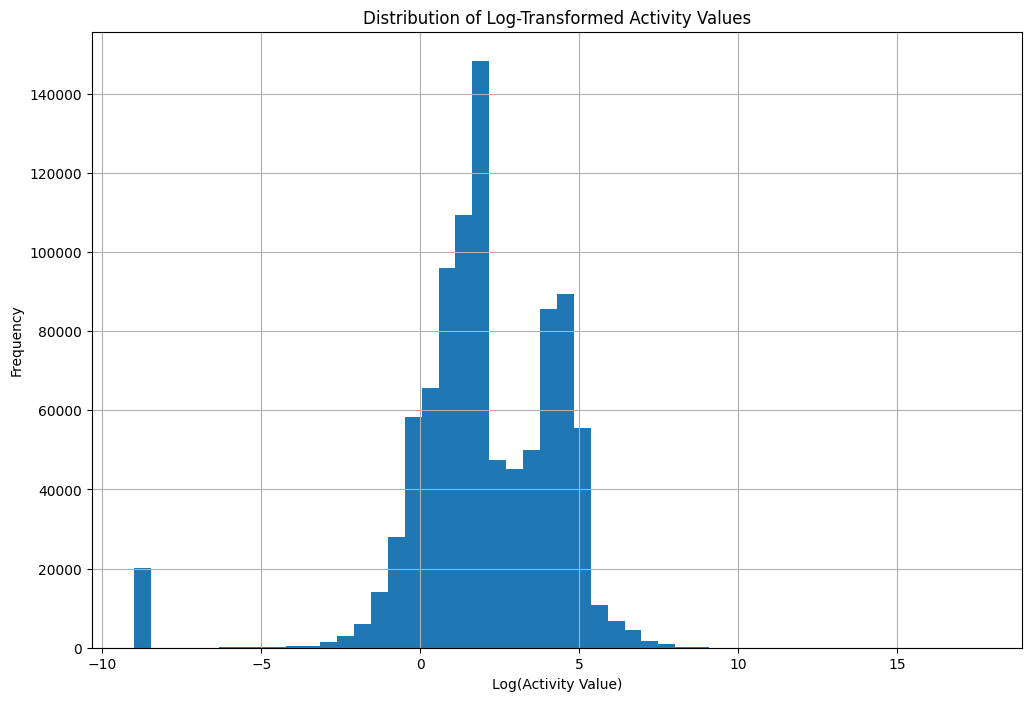

In [27]:
activity_records =pd.read_table('NPASSv2.0_download_naturalProducts_activities.txt',low_memory=False, na_values=['n.a.'])
plt.figure(figsize=(12, 8))
activity_records['activity_value'].hist(bins=40)
plt.title('Distribution of Activity Values')
plt.xlabel('Activity Value')
plt.ylabel('Frequency')
plt.show()


## Post transformation

activity_records['log_activity_value'] = np.log10(activity_records['activity_value'] + 1e-9)

# Plot a histogram of log-transformed activity values
plt.figure(figsize=(12, 8))
activity_records['log_activity_value'].hist(bins=50)
plt.title('Distribution of Log-Transformed Activity Values')
plt.xlabel('Log(Activity Value)')
plt.ylabel('Frequency')
plt.show()

## Distribution of Natural Products by Species


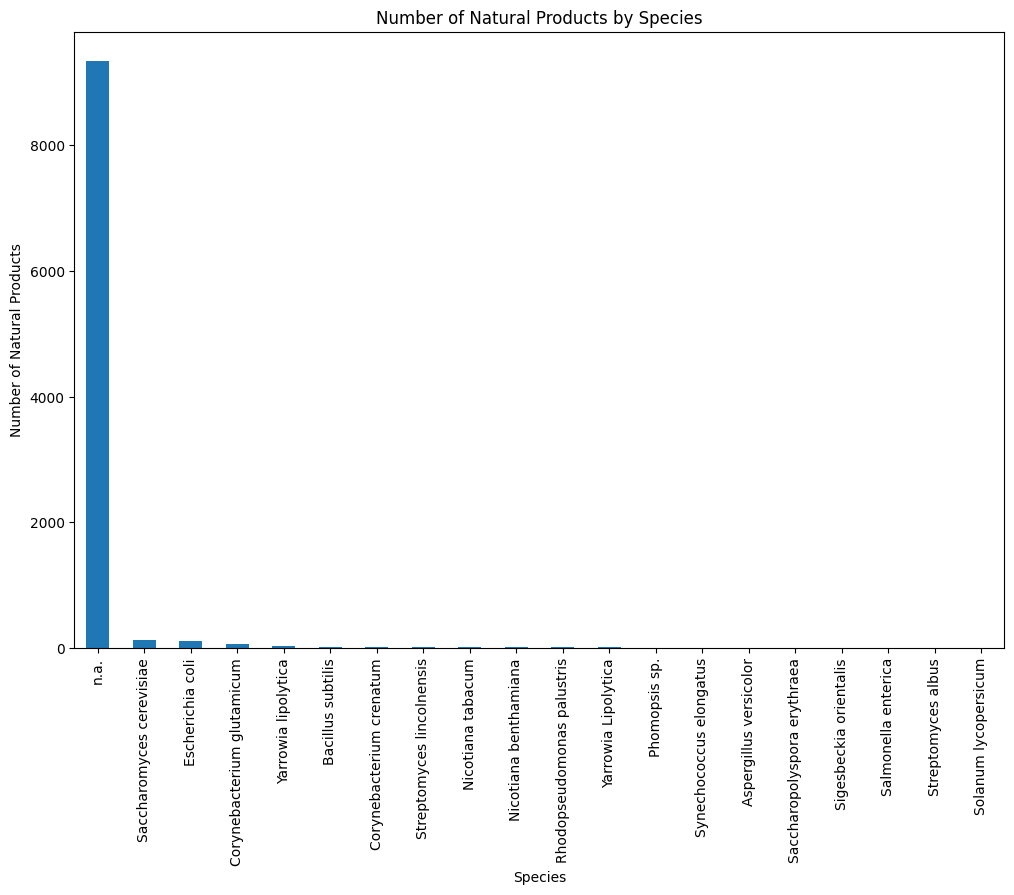

In [33]:
species_name = pd.read_table('NPASSv2.0_download_naturalProducts_speciesInfo.txt', low_memory = False, na_values=['na.a'])
species_counts = species_name['species_name'].value_counts().head(20)  # Top 10 species for clarity

# Plot a bar chart
plt.figure(figsize=(12, 8))
species_counts.plot.bar()
plt.title('Number of Natural Products by Species')
plt.xlabel('Species')
plt.ylabel('Number of Natural Products')
plt.show()

### Structure Analysis

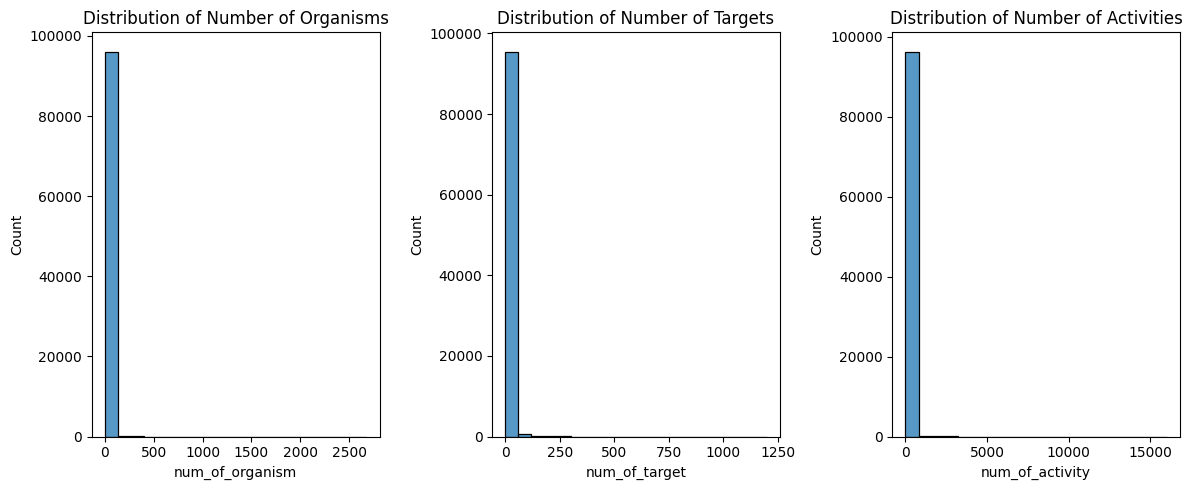

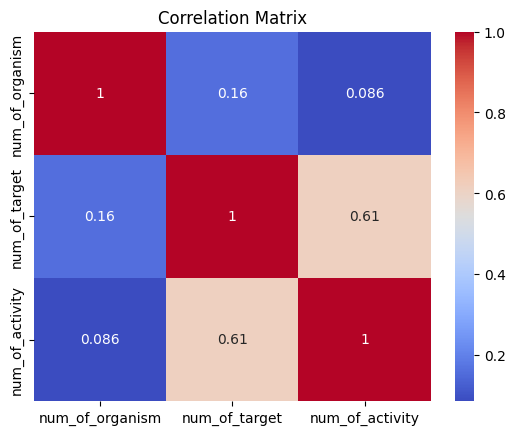

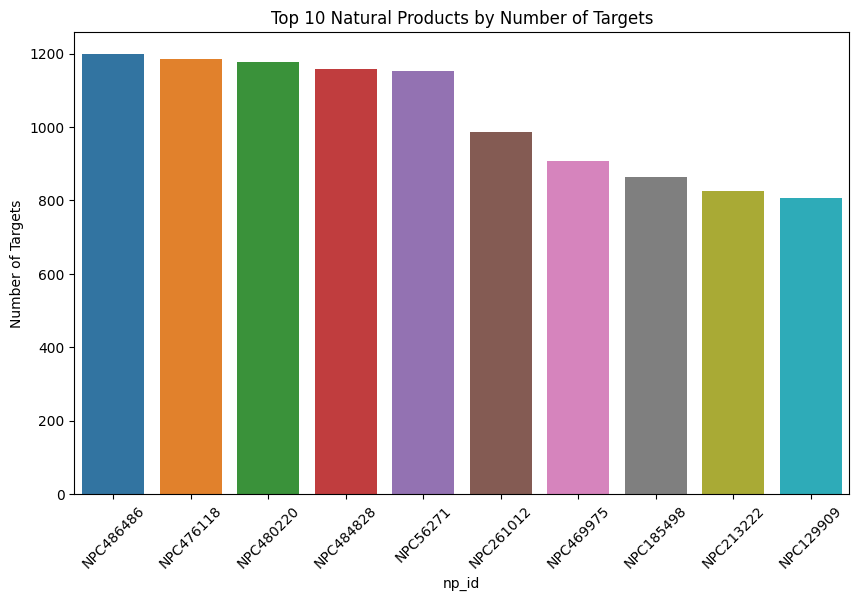

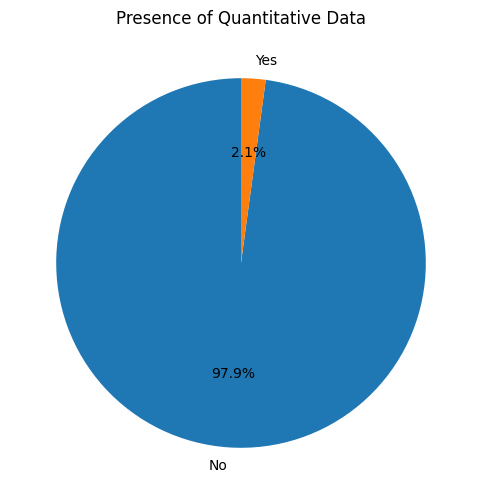

In [38]:
general_info = pd.read_table('NPASSv2.0_download_naturalProducts_generalInfo.txt',low_memory =False, na_values=['n.a.'])
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(general_info['num_of_organism'], bins=20)
plt.title('Distribution of Number of Organisms')

plt.subplot(1, 3, 2)
sns.histplot(general_info['num_of_target'], bins=20)
plt.title('Distribution of Number of Targets')

plt.subplot(1, 3, 3)
sns.histplot(general_info['num_of_activity'], bins=20)
plt.title('Distribution of Number of Activities')

plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = general_info[['num_of_organism', 'num_of_target', 'num_of_activity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Bar chart for top 10 natural products by number of targets
top_targets = general_info.nlargest(10, 'num_of_target')
plt.figure(figsize=(10, 6))
sns.barplot(x='np_id', y='num_of_target', data=top_targets)
plt.xticks(rotation=45)
plt.title('Top 10 Natural Products by Number of Targets')
plt.ylabel('Number of Targets')
plt.show()

# Presence of Quantitative Data
quantity_counts = general_info['if_has_Quantity'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quantity_counts, labels=quantity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Presence of Quantitative Data')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_21428\2365762576.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_data['org_collect_time'] = pd.to_datetime(merged_data['org_collect_time'], errors='coerce')


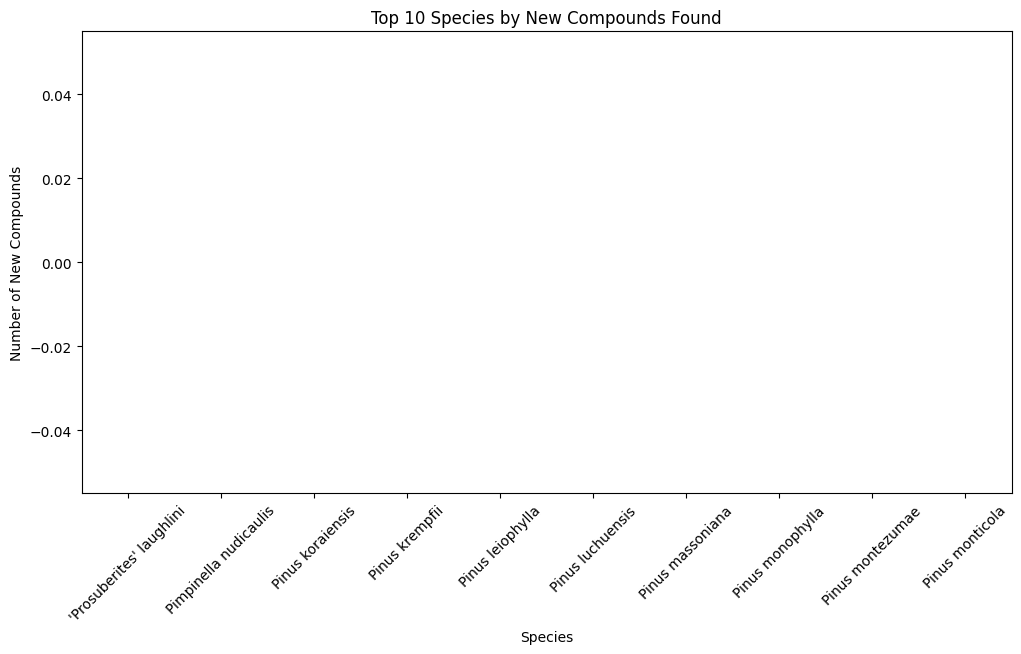

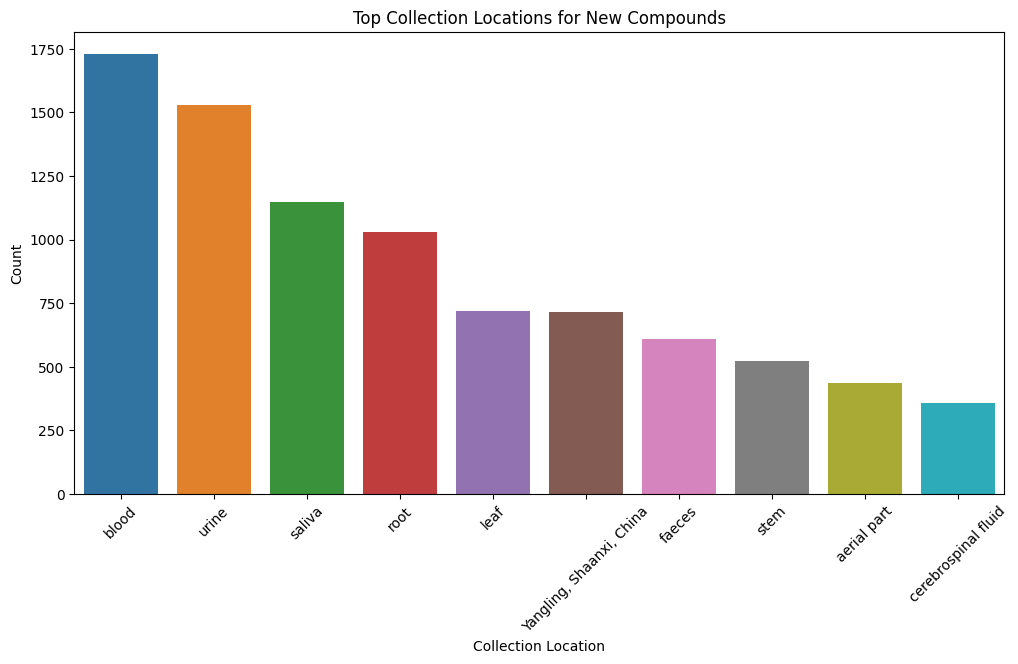

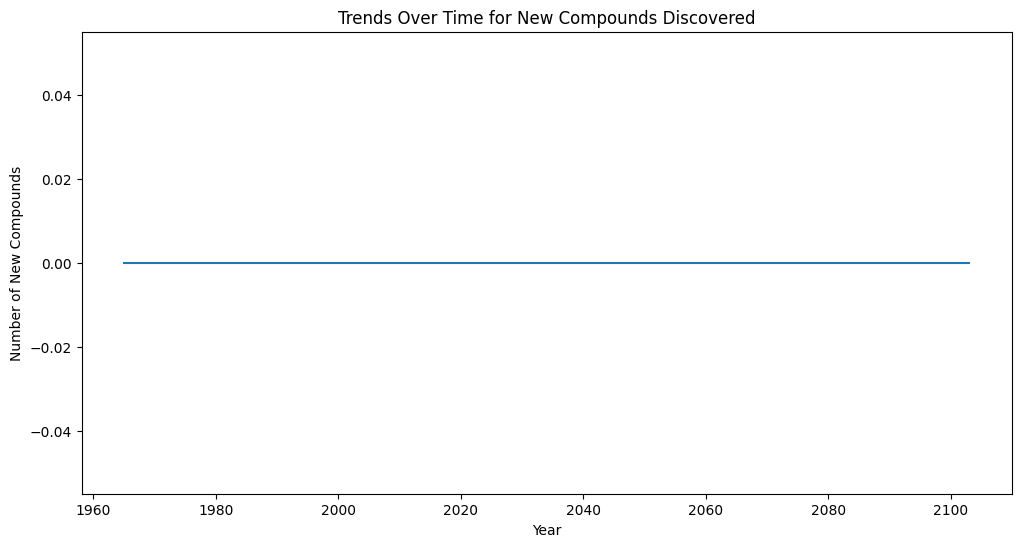

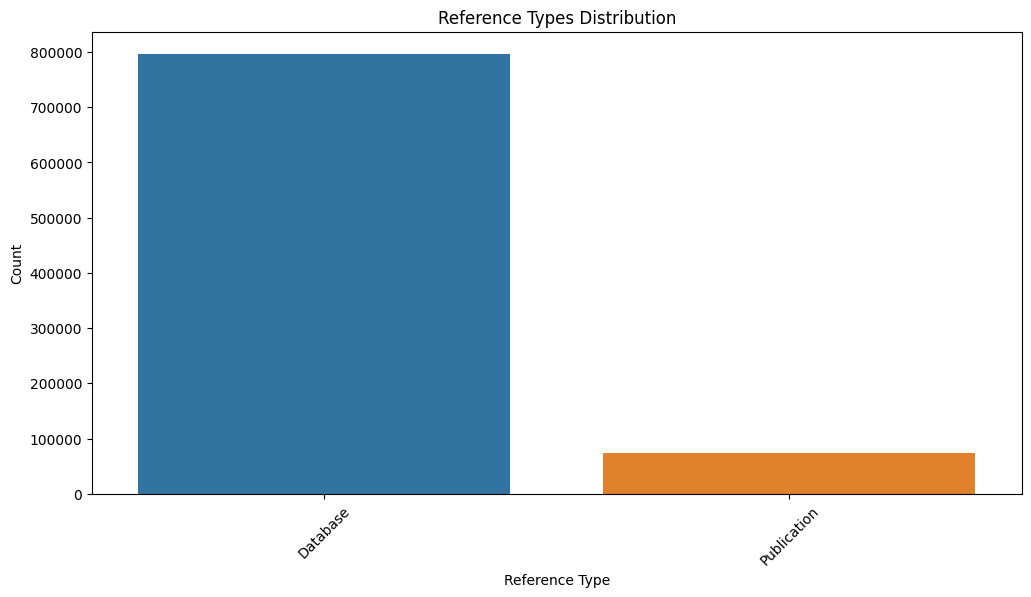

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
species_info = pd.read_table('NPASSv2.0_download_naturalProducts_speciesInfo.txt', low_memory=False, na_values=['n.a.'])
species_pair = pd.read_table('NPASSv2.0_download_naturalProducts_species_pair.txt', low_memory=False, na_values=['n.a.'])

# Merge species_pair with species_info on org_id
merged_data = species_pair.merge(species_info, on='org_id')

# Ensure numeric columns are properly converted to numeric types
merged_data['new_cp_found'] = pd.to_numeric(merged_data['new_cp_found'], errors='coerce')
merged_data['org_collect_time'] = pd.to_datetime(merged_data['org_collect_time'], errors='coerce')

# Analysis 1: Count new compounds found for each species
new_compounds = merged_data.groupby('species_name')['new_cp_found'].sum().reset_index()
new_compounds = new_compounds.sort_values(by='new_cp_found', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='species_name', y='new_cp_found', data=new_compounds.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Species by New Compounds Found')
plt.xlabel('Species')
plt.ylabel('Number of New Compounds')
plt.show()

# Analysis 2: Top collection locations for discovering new compounds
top_locations = merged_data['org_collect_location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.xticks(rotation=45)
plt.title('Top Collection Locations for New Compounds')
plt.xlabel('Collection Location')
plt.ylabel('Count')
plt.show()

# Analysis 3: Trends over time for new compounds discovered
time_trends = merged_data.groupby(merged_data['org_collect_time'].dt.year)['new_cp_found'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='org_collect_time', y='new_cp_found', data=time_trends)
plt.title('Trends Over Time for New Compounds Discovered')
plt.xlabel('Year')
plt.ylabel('Number of New Compounds')
plt.show()

# Analysis 4: Reference source analysis
reference_types = merged_data['ref_type'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=reference_types.index, y=reference_types.values)
plt.xticks(rotation=45)
plt.title('Reference Types Distribution')
plt.xlabel('Reference Type')
plt.ylabel('Count')
plt.show()


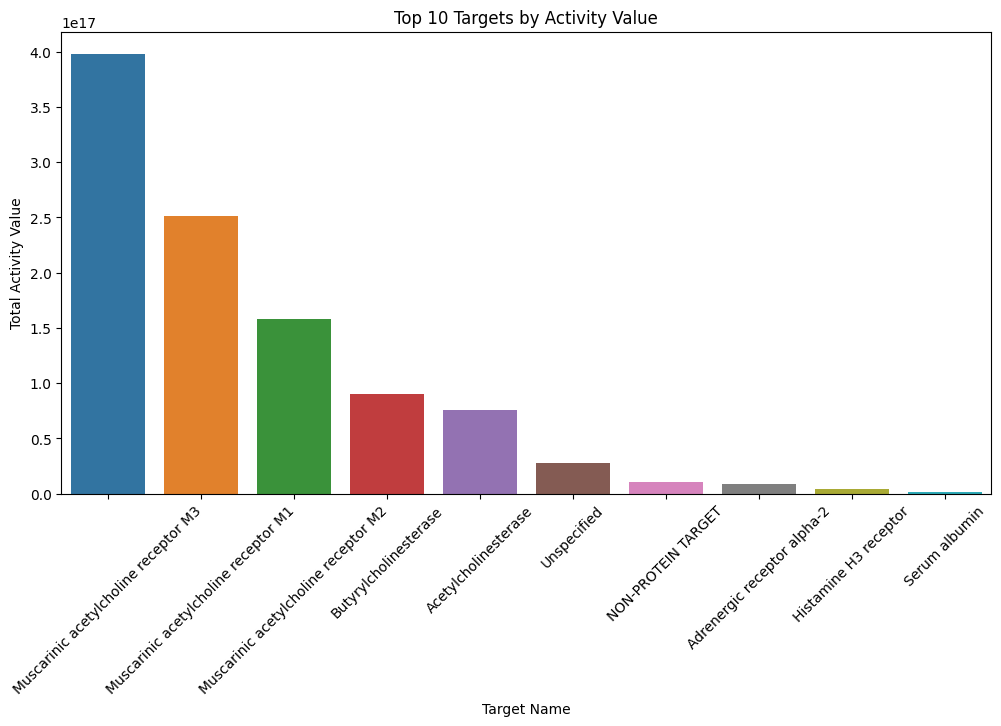

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
targetinfo = pd.read_table('NPASSv2.0_download_naturalProducts_targetInfo.txt', low_memory = False,na_values=['n.a.'])
activity = pd.read_table('NPASSv2.0_download_naturalProducts_activities.txt', low_memory= False,na_values=['n.a.'])
merged_data = activity.merge(targetinfo, on='target_id')

# Group by target name and summarize activities
target_activity_summary = merged_data.groupby('target_name')['activity_value'].sum().reset_index()
target_activity_summary = target_activity_summary.sort_values(by='activity_value', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='target_name', y='activity_value', data=target_activity_summary.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Targets by Activity Value')
plt.xlabel('Target Name')
plt.ylabel('Total Activity Value')
plt.show()


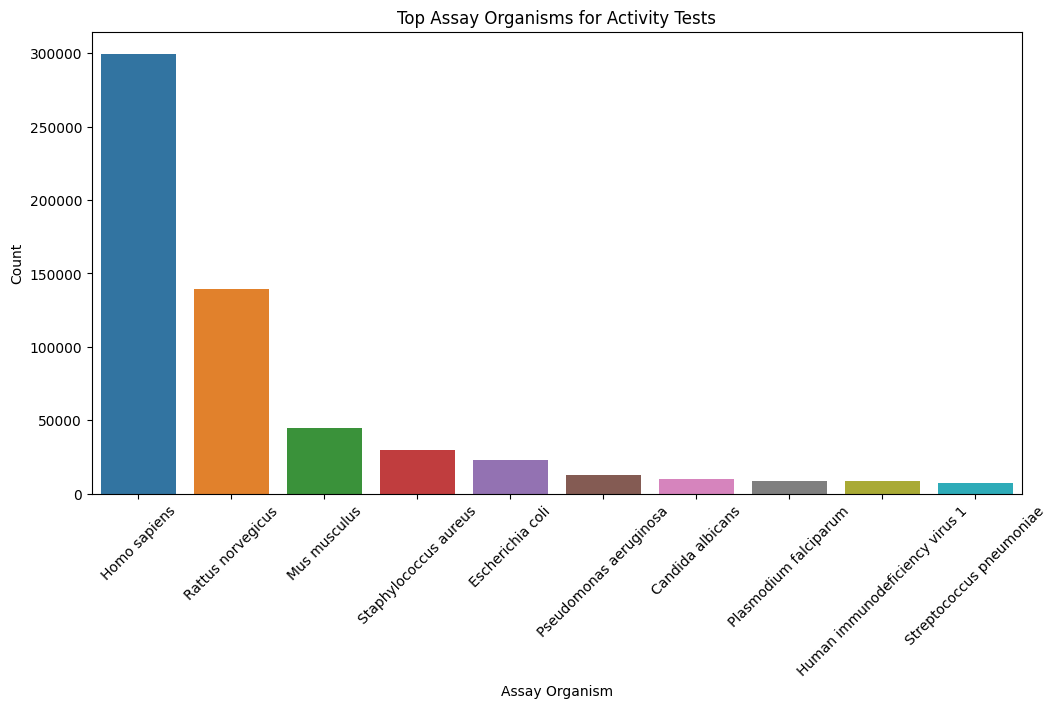

In [49]:
# Group activities by assay organism
activity = pd.read_table('NPASSv2.0_download_naturalProducts_activities.txt', low_memory= False,na_values=['n.a.'])

assay_trends = activity['assay_organism'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=assay_trends.index, y=assay_trends.values)
plt.xticks(rotation=45)
plt.title('Top Assay Organisms for Activity Tests')
plt.xlabel('Assay Organism')
plt.ylabel('Count')
plt.show()